In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
df = pd.read_excel("data.xlsx")
df

,AT,V,AP,RH,PE
0,10.54,34.03,1018.71,74.00,478.77
1,7.08,39.99,1010.55,91.44,482.83
2,14.49,41.16,1000.50,82.17,465.24
3,10.73,25.36,1009.35,100.15,469.43
4,22.88,63.91,1009.63,87.82,442.50
...,...,...,...,...,...
9563,24.99,58.79,1016.37,67.16,439.20
9564,14.22,44.99,1012.00,75.28,460.53
9565,18.76,52.90,1016.27,64.70,458.26
9566,24.82,66.54,1010.00,60.36,440.88


In [ ]:
df.dtypes

AT    float64
V     float64
AP    float64
RH    float64
PE    float64
dtype: object

In [ ]:
df.describe()

,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


In [ ]:
#egyedi értékek
df.loc[:,df.dtypes == 'float64'].nunique()

AT    2773
V      634
AP    2517
RH    4546
PE    4836
dtype: int64

In [ ]:
df.shape

(9568, 5)

In [ ]:
#nincsenek hiányzó értékek
print(df.count())
print(df.isnull().sum())

AT    9568
V     9568
AP    9568
RH    9568
PE    9568
dtype: int64
AT    0
V     0
AP    0
RH    0
PE    0
dtype: int64


In [ ]:
for col in df.columns.values:
  print(f"{col}:    mode:   {df[col].mode()}")

AT:    mode:   0    25.21
Name: AT, dtype: float64
V:    mode:   0    41.17
1    70.32
Name: V, dtype: float64
AP:    mode:   0    1013.88
Name: AP, dtype: float64
RH:    mode:   0    100.09
Name: RH, dtype: float64
PE:    mode:   0    468.8
Name: PE, dtype: float64


In [ ]:
print(df.var())                   #variancia
print(df.std())                   #standard szórás
print(df.std() / df.mean() * 100) #coefficient of variation

AT     55.539357
V     161.490544
AP     35.269152
RH    213.167848
PE    291.282318
dtype: float64
AT     7.452473
V     12.707893
AP     5.938784
RH    14.600269
PE    17.066995
dtype: float64
AT    37.923696
V     23.400617
AP     0.586107
RH    19.916072
PE     3.756230
dtype: float64


adatok szemléltetése, outlier-ek

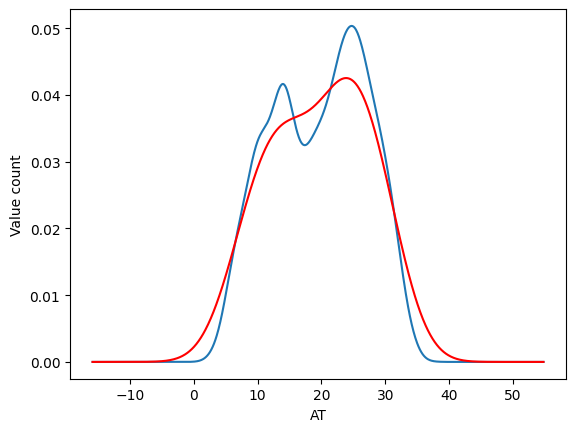

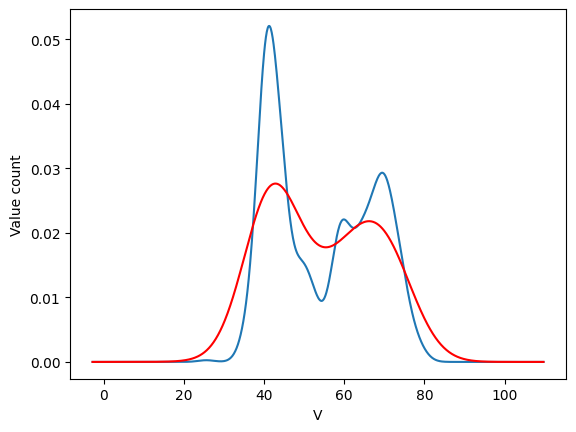

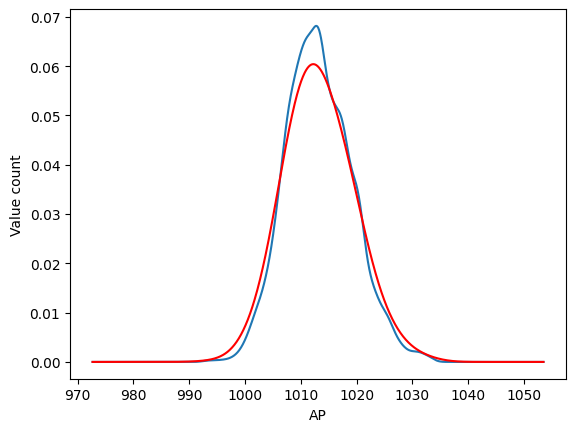

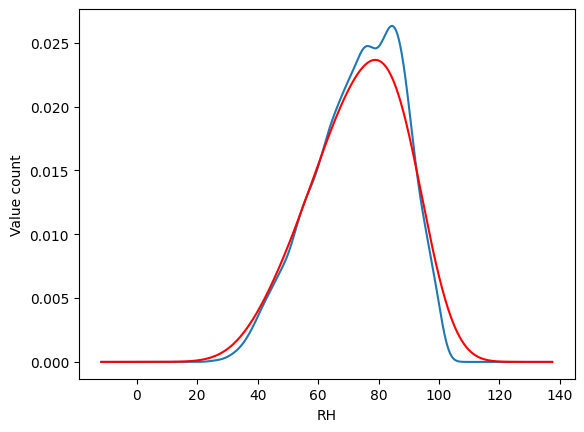

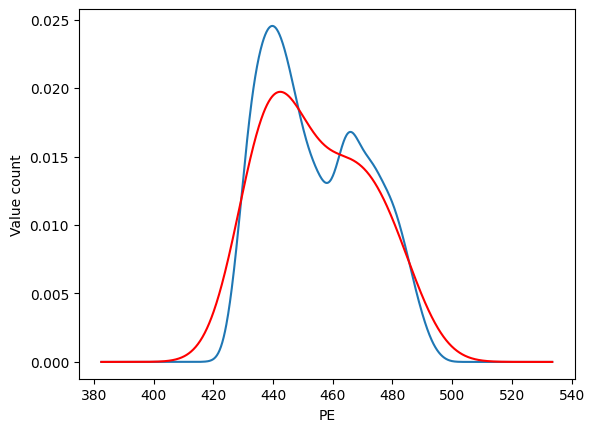

In [ ]:
#értékek szemléltetése
for col in df.columns.values:
  plt.figure()
  df[col].plot.density()
  df[col].plot.density(bw_method=0.5, color='red')
  plt.xlabel(col)
  plt.ylabel('Value count')

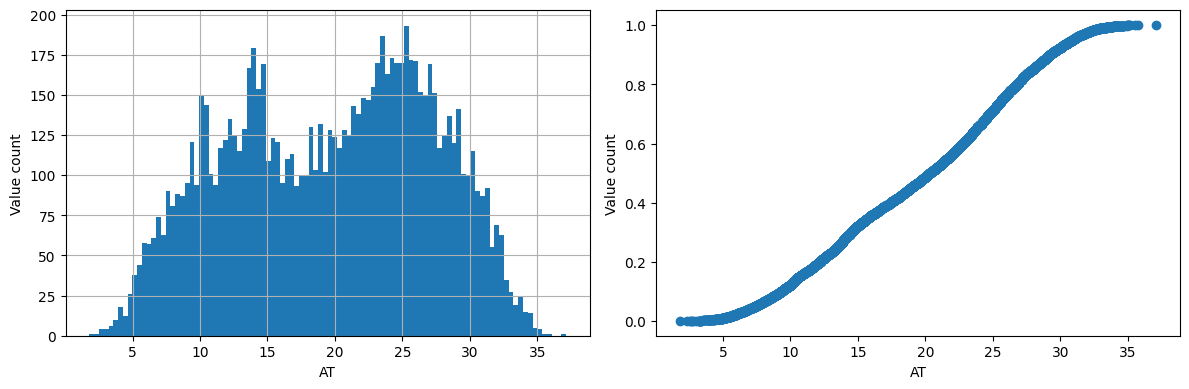

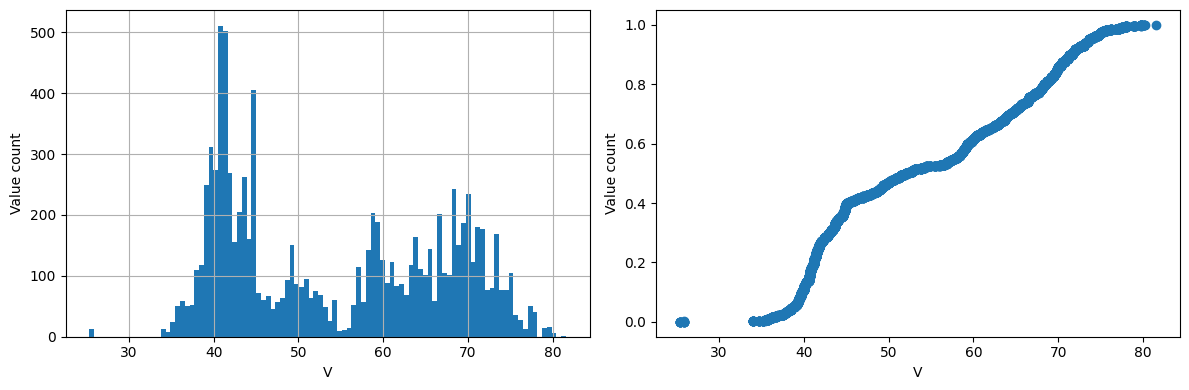

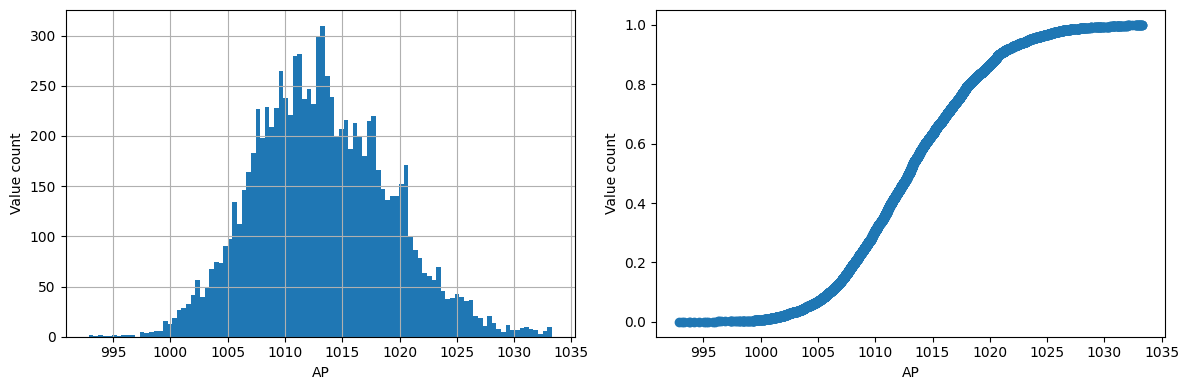

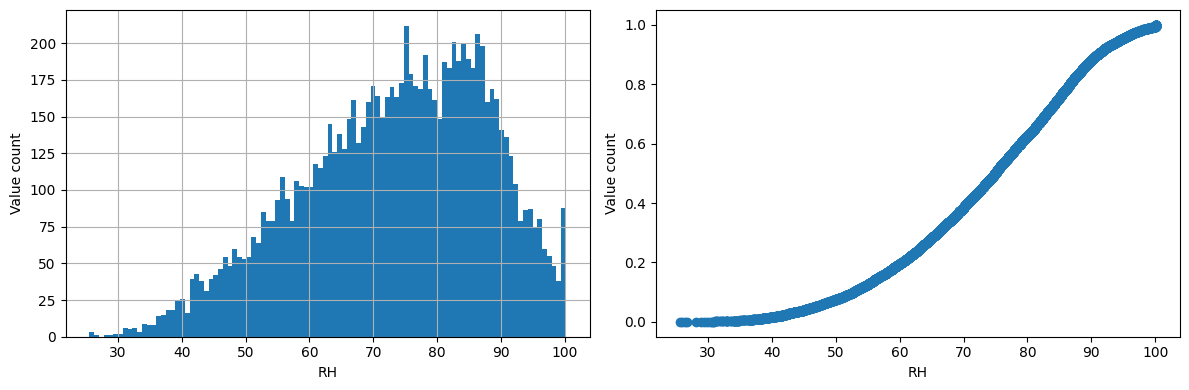

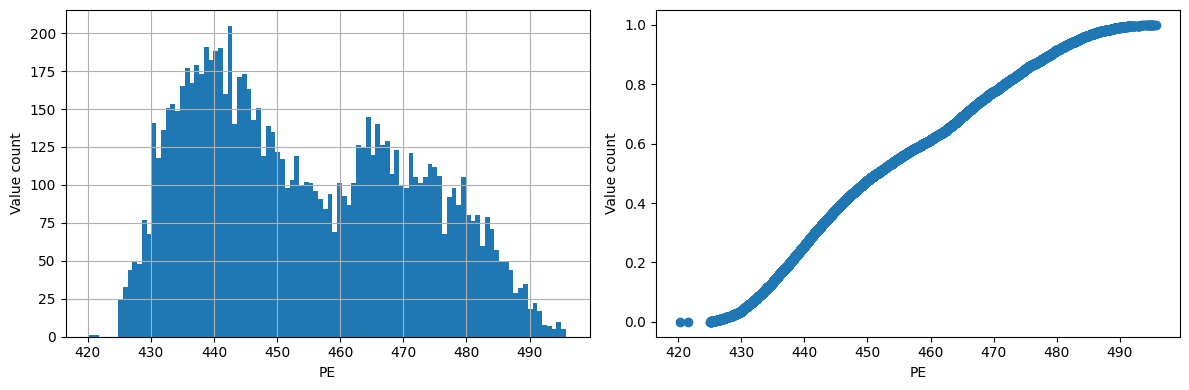

In [ ]:
for col in df.columns.values:
  #histogram
  plt.subplot(1, 2, 1)
  df[col].hist(bins=100, figsize=(12,4))
  plt.xlabel(col)
  plt.ylabel('Value count')

  #eloszlásfüggvény
  plt.subplot(1, 2, 2)
  p = np.arange(0, len(df[col])) / len(df[col])   #segédvektor létrehozása
  plt.scatter(df[col].sort_values(), p)
  plt.xlabel(col)
  plt.ylabel('Value count')

  plt.tight_layout()
  plt.show()

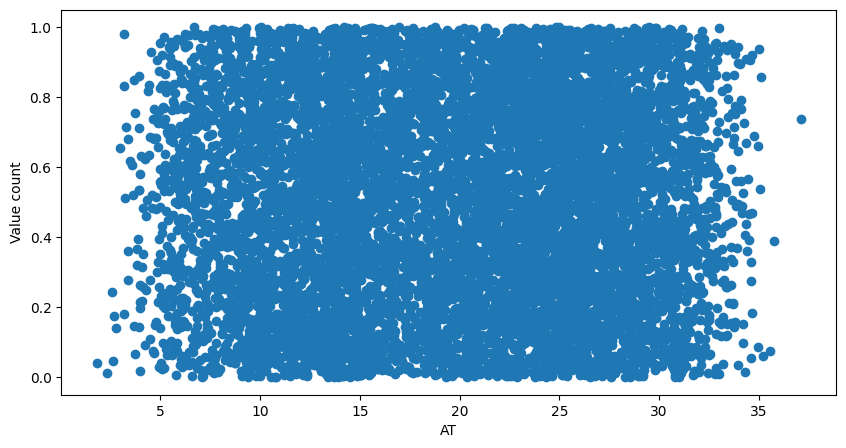

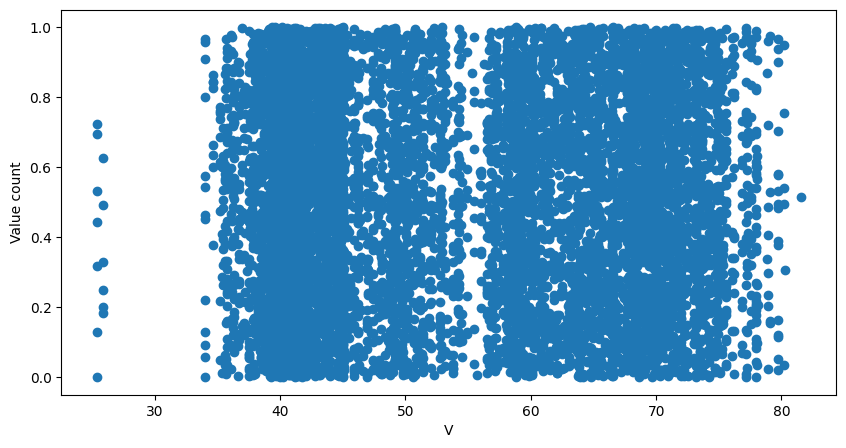

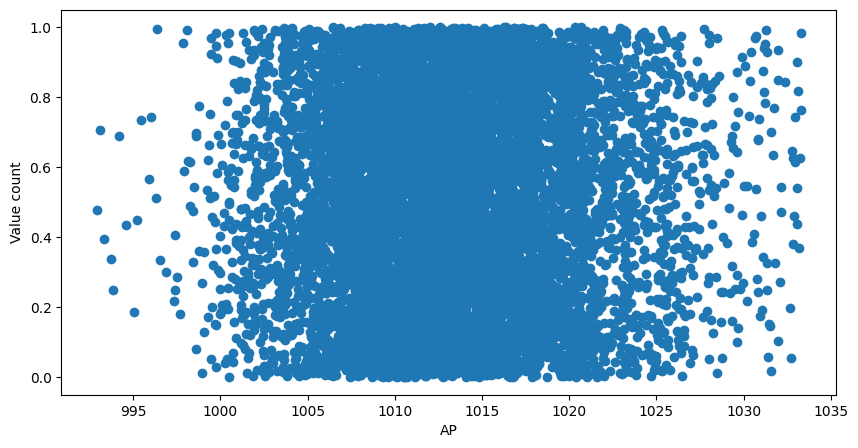

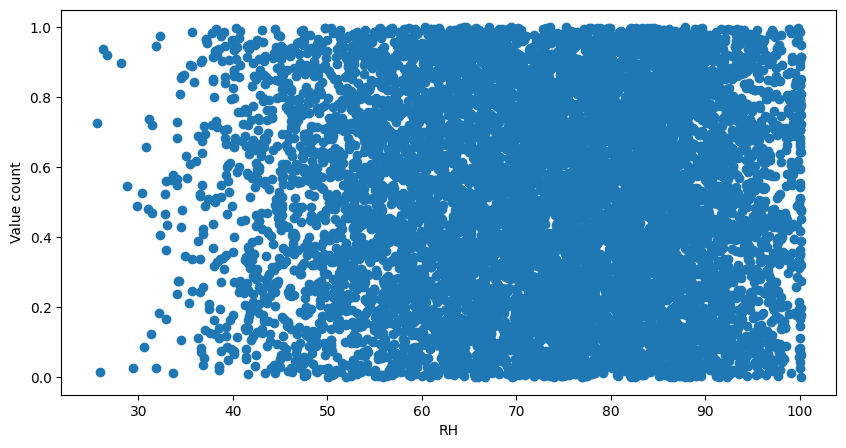

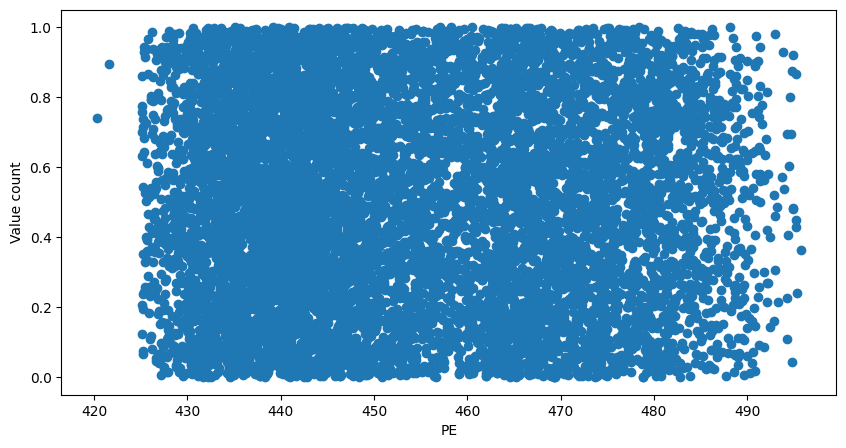

In [ ]:
for col in df.columns.values:
  p = np.arange(0, len(df[col])) / len(df[col])

  fig, ax = plt.subplots(figsize=(10,5))
  ax.scatter(df[col], p)
  ax.set_xlabel(col)
  ax.set_ylabel('Value count')

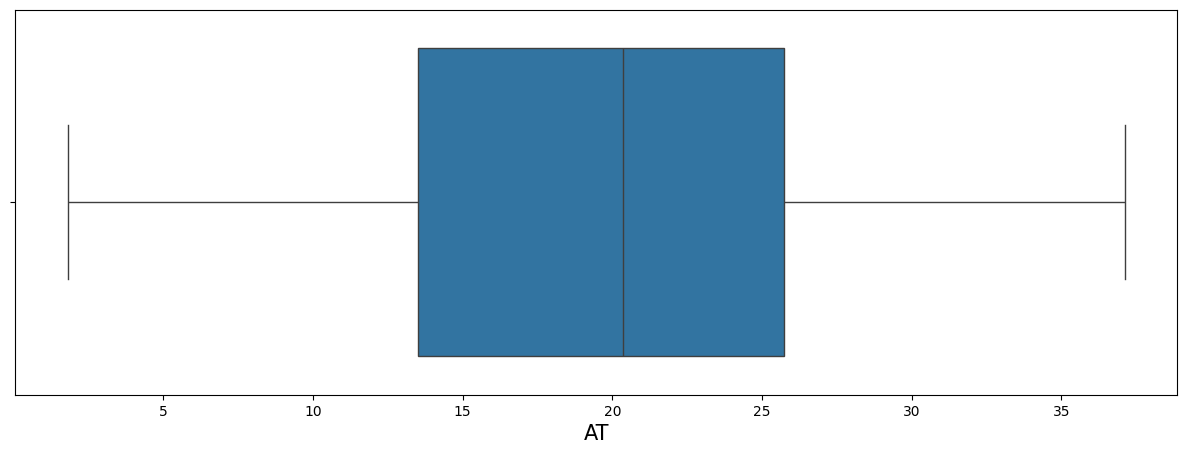

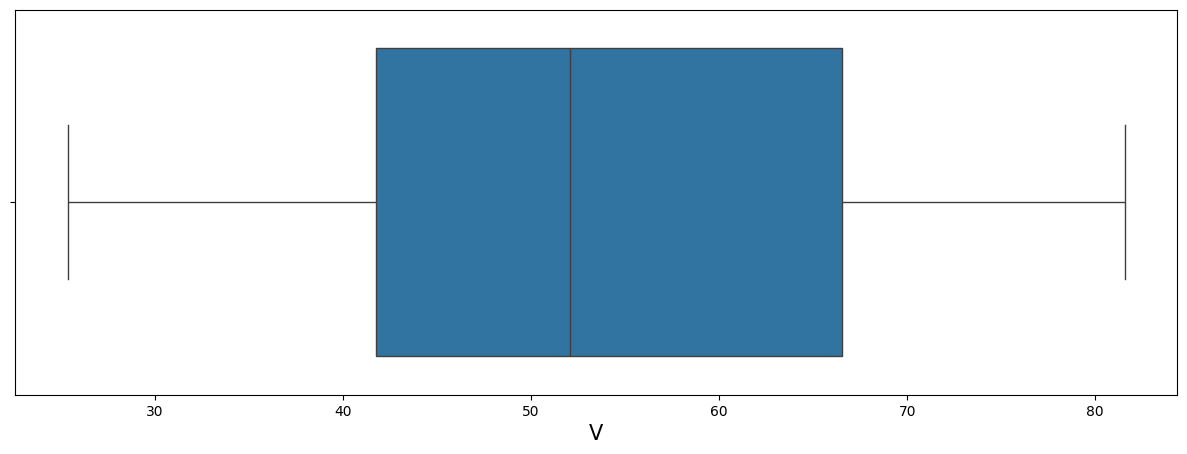

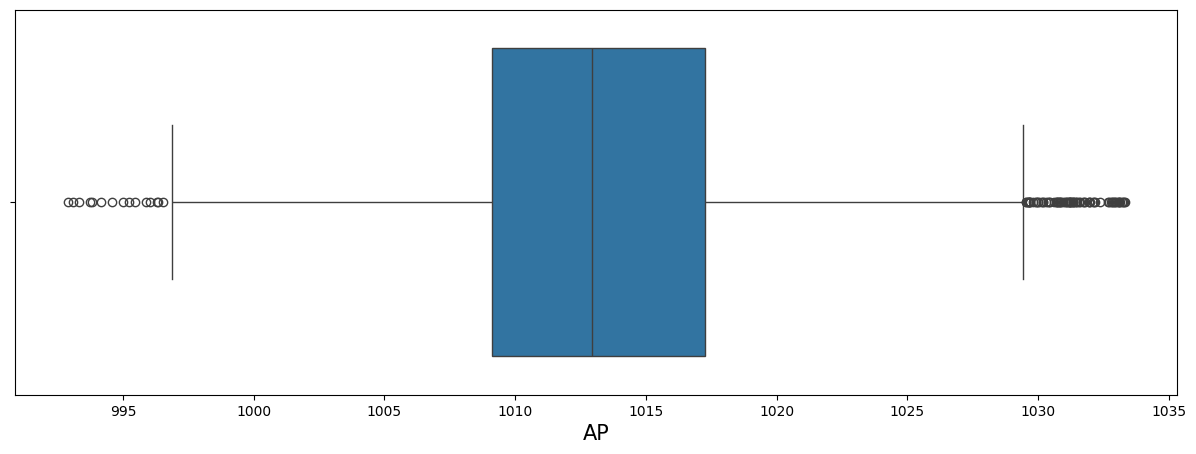

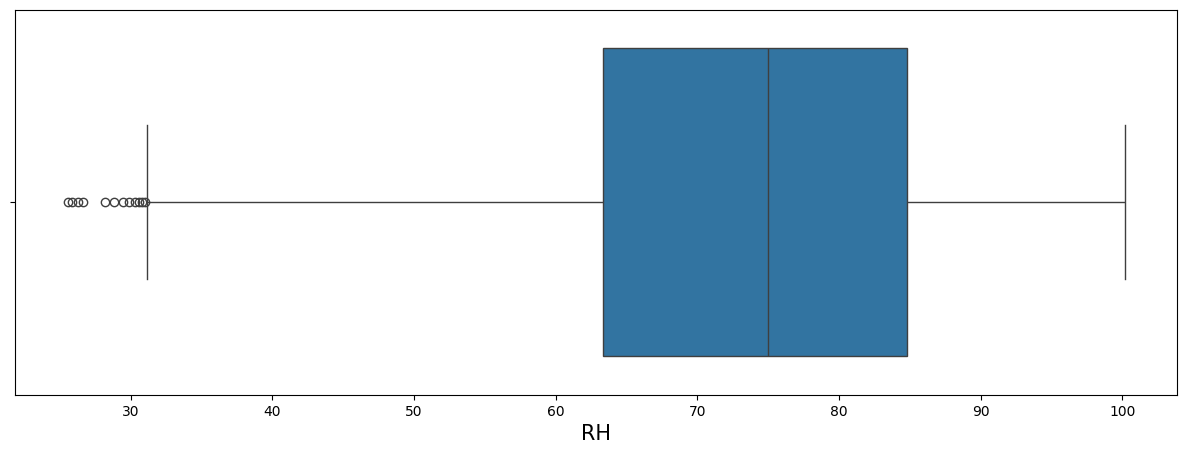

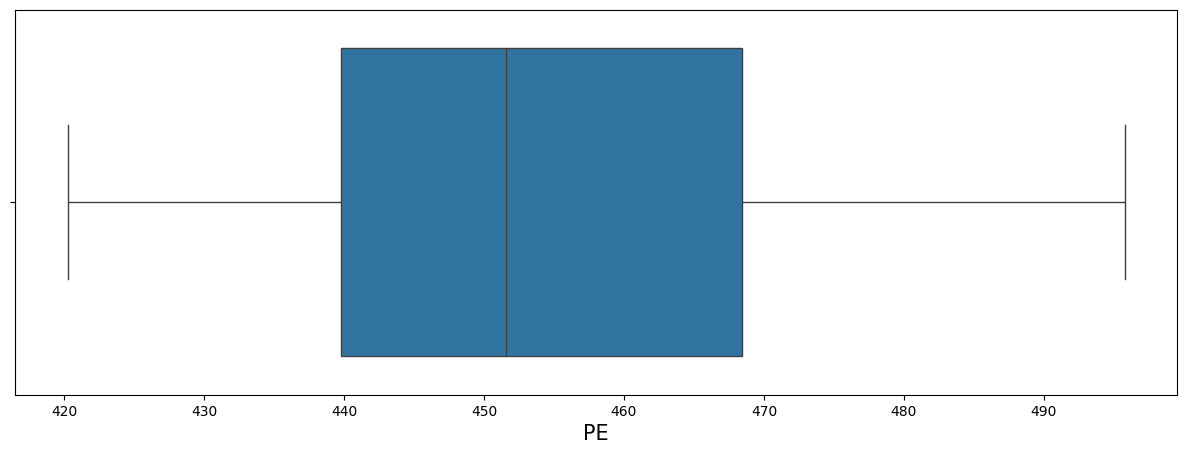

In [ ]:
for col in df.columns.values:
  plt.figure(figsize=(15, 5))
  sns.boxplot(x=df[col]).set_xlabel(col,fontsize=15)

Z-Score

In [ ]:
#Z-score
from scipy import stats
import numpy as np

z = np.abs(stats.zscore(df))
threshold = 2.8                 #2.8-as értékkel adja ugyanazt mint az IQR
print(np.where(z > threshold))
df_o = df[(z < threshold).all(axis=1)]
df_o.shape

(array([ 154,  166,  247,  254,  527,  541,  814,  992, 1171, 1400, 1450,
       1665, 1761, 1792, 1841, 1897, 2073, 2341, 2390, 2395, 2576, 2595,
       2689, 3121, 3128, 3200, 3237, 3283, 3537, 3643, 3691, 3785, 3877,
       3913, 4170, 4184, 4292, 4401, 4415, 4437, 4477, 4505, 4565, 4610,
       4674, 4890, 5048, 5149, 5178, 5193, 5214, 5228, 5234, 5424, 5886,
       5988, 5993, 6082, 6181, 6287, 6493, 6523, 6591, 6709, 6771, 6890,
       6936, 7021, 7045, 7067, 7100, 7113, 7148, 7299, 7371, 7499, 7789,
       7827, 8060, 8093, 8125, 8368, 8501, 8598, 8606, 8743, 8801, 8883,
       8887, 8953, 8968, 8994, 9041, 9102, 9262, 9321, 9338, 9403, 9490,
       9530]), array([3, 2, 3, 3, 2, 2, 3, 2, 3, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 3,
       3, 2, 3, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 3,
       3, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 3, 2,
       2, 2, 3, 2, 3, 2, 2, 3, 2, 2

(9468, 5)

IQR - interquartile range

In [ ]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
#interquantilis range
IQR = Q3 - Q1
IQR

AT    12.2100
V     24.8000
AP     8.1600
RH    21.5025
PE    28.6800
dtype: float64

In [ ]:
#upper és lower whisker
UW = Q3 + 1.5 * IQR
LW = Q1 - 1.5 * IQR
print(UW, LW)

AT      44.03500
V      103.74000
AP    1029.50000
RH     117.08375
PE     511.45000
dtype: float64 AT     -4.80500
V       4.54000
AP    996.86000
RH     31.07375
PE    396.73000
dtype: float64


In [ ]:
#true ha az adat LW,UW kívül esik -> outlier
print((df < LW) |(df > UW))

         AT      V     AP     RH     PE
0     False  False  False  False  False
1     False  False  False  False  False
2     False  False  False  False  False
3     False  False  False  False  False
4     False  False  False  False  False
...     ...    ...    ...    ...    ...
9563  False  False  False  False  False
9564  False  False  False  False  False
9565  False  False  False  False  False
9566  False  False  False  False  False
9567  False  False  False  False  False

[9568 rows x 5 columns]


In [ ]:
#outlier-ek törlése
outliers = df[((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
print(f"DataFrame containing the removed outliers: {outliers.shape}")

df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
print(f"DataFrame without outliers: {df.shape}")

DataFrame containing the removed outliers: (100, 5)
DataFrame without outliers: (9468, 5)


Relation between variables

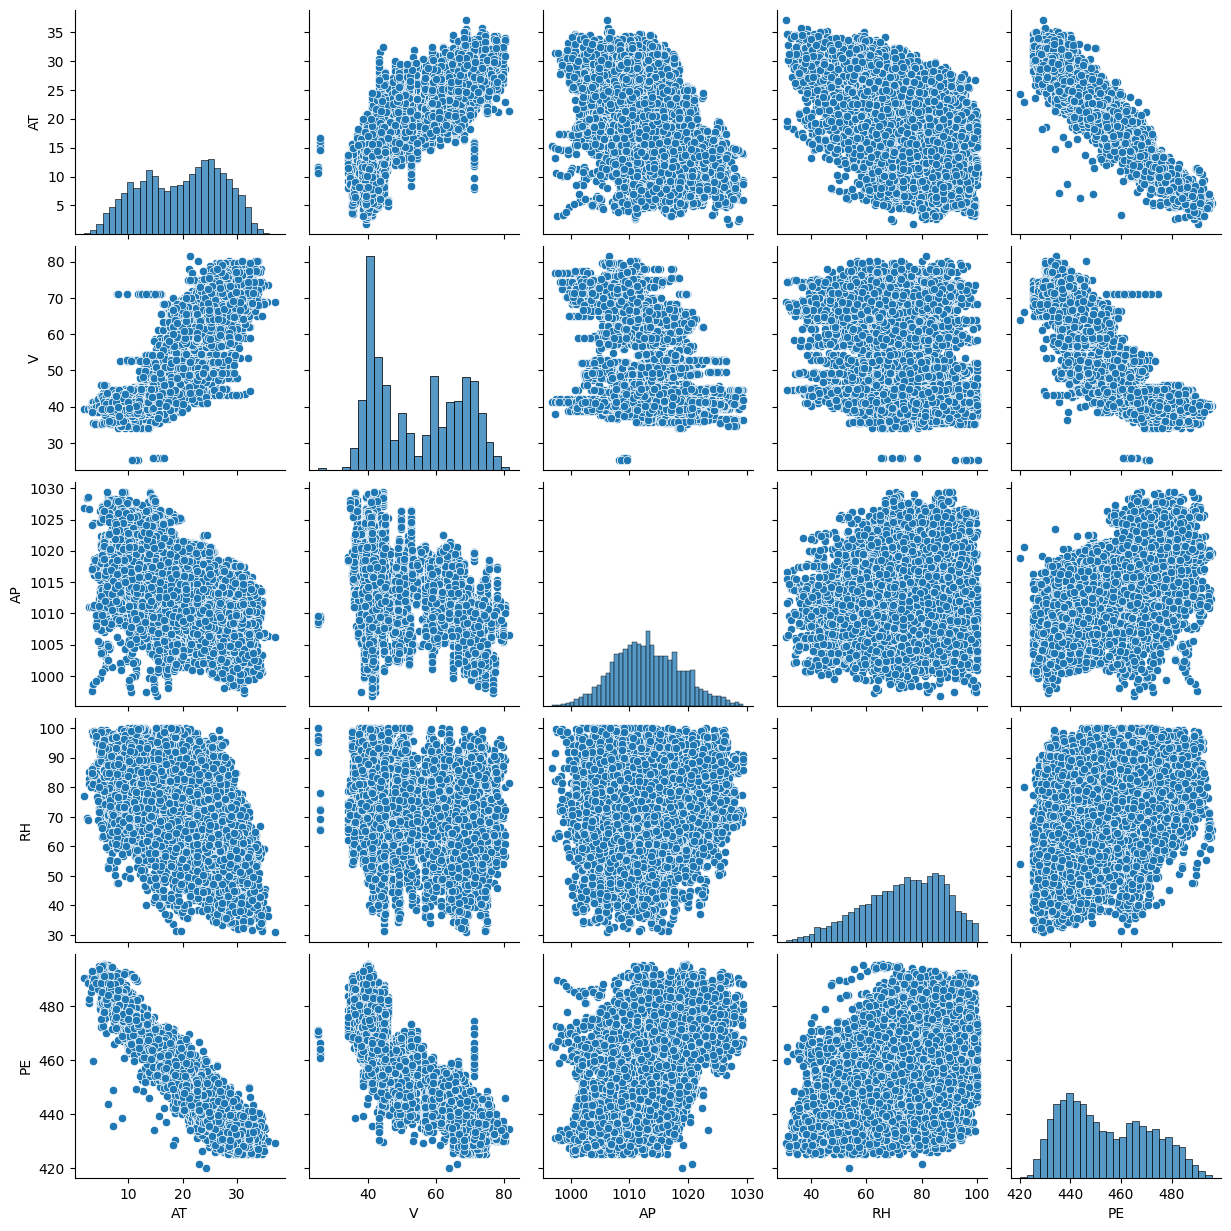

In [ ]:
sns.pairplot(df)

          AT         V        AP        RH        PE
AT  1.000000  0.842854 -0.509109 -0.542533 -0.947541
V   0.842854  1.000000 -0.415623 -0.310705 -0.868783
AP -0.509109 -0.415623  1.000000  0.106174  0.521529
RH -0.542533 -0.310705  0.106174  1.000000  0.388508
PE -0.947541 -0.868783  0.521529  0.388508  1.000000


<Axes: >

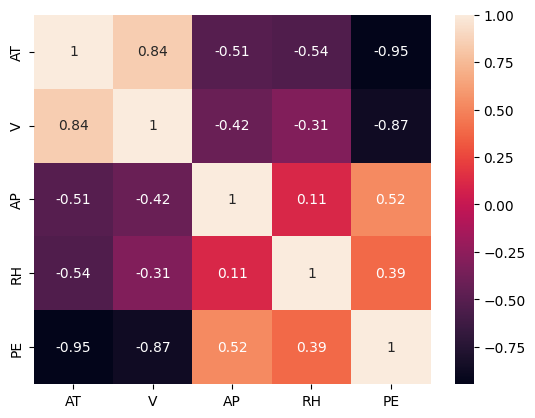

In [ ]:
corr = df.corr()
print(corr)
sns.heatmap(corr, annot=True)